In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset directly from kaggle and place in our project directory.
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:04<00:00, 42.2MB/s]
100% 149M/149M [00:04<00:00, 36.4MB/s]


In [3]:
# Function to iterate through each of the MRI scans and load the metadata into a dataframe.
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path.
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory.
    if os.path.isdir(label_path):
      # Iterate through images in the label directory.
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists.
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data.
  df = pd.DataFrame({
      "Class Path": class_paths,
      "Class": classes
  })

  return df

In [4]:
# Load the metadata for the training data set and save the output.
tr_df = get_class_paths("/content/Training")

In [5]:
# Print the dataframe of training data image paths (Class Path) and tumor labels (Class).
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [6]:
# Load the metadata for the testing data set and save the output.
ts_df = get_class_paths("/content/Testing")

In [7]:
# Print the dataframe of testing data image paths (Class Path) and tumor labels (Class).
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


# Exploring the data to get a better understanding of it

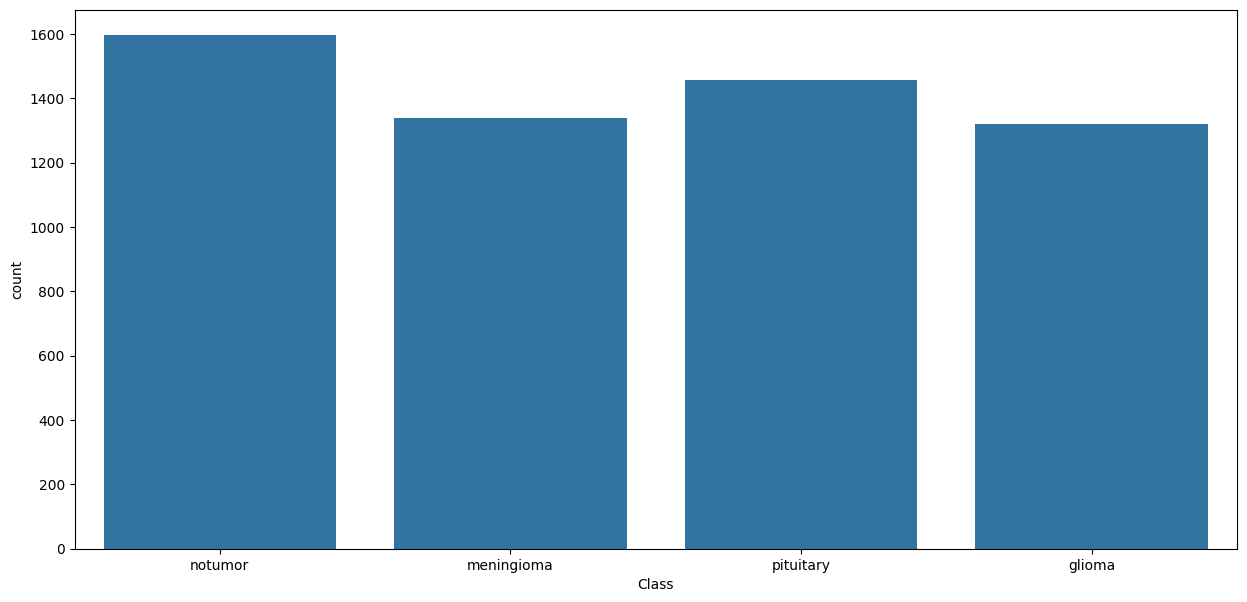

In [8]:
# Plot the different types of tumors and how many of each there are in the training data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df["Class"])

We can see each class has approximately the same amount of MRI scans in the data set, making it a fairly balanced data set.

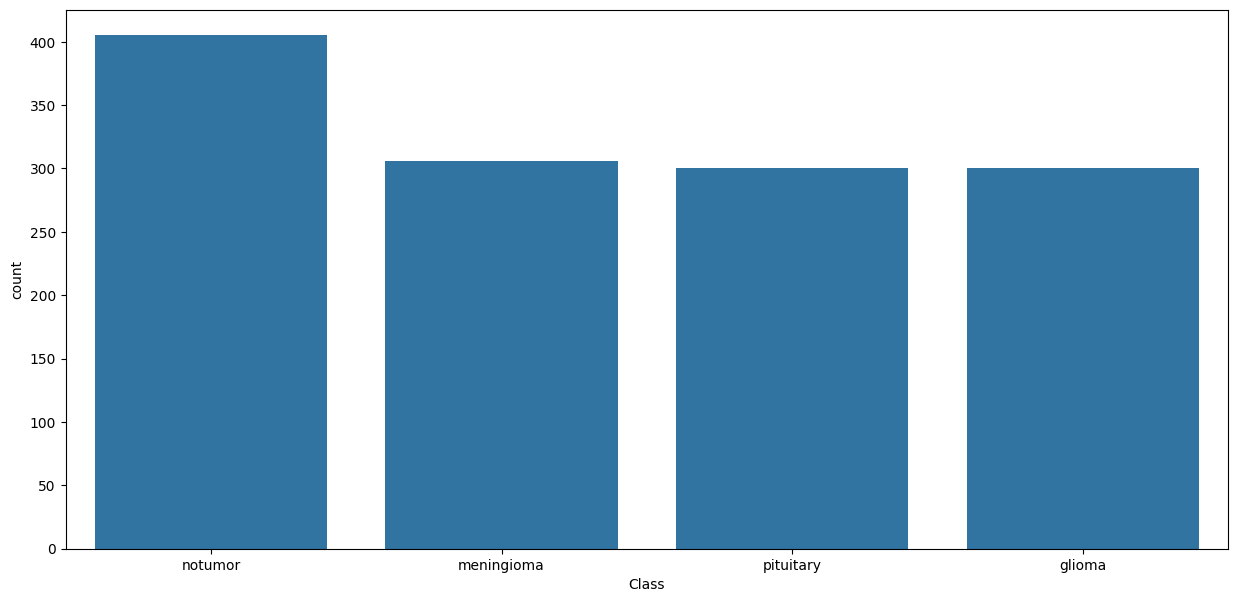

In [9]:
# Plot the different types of tumors and how many of each there are in the testing data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df["Class"])

# Splitting our data into training, testing and validation data sets

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

# Sequential is a class that allows us to build a neural network model layer by layer.
# Think of it like stacking building blocks on top of each other, where each block represents a layer
# in the neural network.  This allows us to more easily understand the architecture of deep-learning
# models.
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Split the testing data set into a validation and testing set.
# Set aside some of the testing data for validation (crutial for tuning the model and preventing overfitting.)
# Stratify ensures the data is split in a way that maintains the proportionality of each class label in the original
# data set, in the training and testing sets.
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [12]:
# Print the newly created validation dataframe.
valid_df

,Class Path,Class
994,/content/Testing/pituitary/Te-pi_0268.jpg,pituitary
569,/content/Testing/meningioma/Te-me_0077.jpg,meningioma
1119,/content/Testing/glioma/Te-gl_0155.jpg,glioma
268,/content/Testing/notumor/Te-no_0167.jpg,notumor
996,/content/Testing/pituitary/Te-pi_0262.jpg,pituitary
...,...,...
574,/content/Testing/meningioma/Te-me_0023.jpg,meningioma
738,/content/Testing/pituitary/Te-pi_0195.jpg,pituitary
269,/content/Testing/notumor/Te-no_0265.jpg,notumor
865,/content/Testing/pituitary/Te-pi_0131.jpg,pituitary


In [13]:
# Print the newly created testing dataframe.
ts_df

,Class Path,Class
849,/content/Testing/pituitary/Te-pi_0013.jpg,pituitary
200,/content/Testing/notumor/Te-no_0403.jpg,notumor
1215,/content/Testing/glioma/Te-gl_0183.jpg,glioma
626,/content/Testing/meningioma/Te-me_0079.jpg,meningioma
28,/content/Testing/notumor/Te-no_0199.jpg,notumor
...,...,...
780,/content/Testing/pituitary/Te-pi_0085.jpg,pituitary
918,/content/Testing/pituitary/Te-pi_0221.jpg,pituitary
1186,/content/Testing/glioma/Te-gl_0232.jpg,glioma
777,/content/Testing/pituitary/Te-pi_0190.jpg,pituitary


# Pre-processing the data

In [14]:
# The number of images the model will process at once.
batch_size = 32

# Set image size for all MRI scans to be resized to.
img_size = (299, 299)
# Rescale the pixels values, and randomly adjust the brightness of the images to help our model
# be more robust.
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
# For testing, only rescale the pixel values, without changing the brightness.  This is because we
# want our data to be consistent and not introduce randomness.
ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
## Use the generators to create 3 data flows: one for training, one for testing and one for validation. ##
## Take the data from the dataframes and prepare them to be fed to our deep-learning model. ##

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


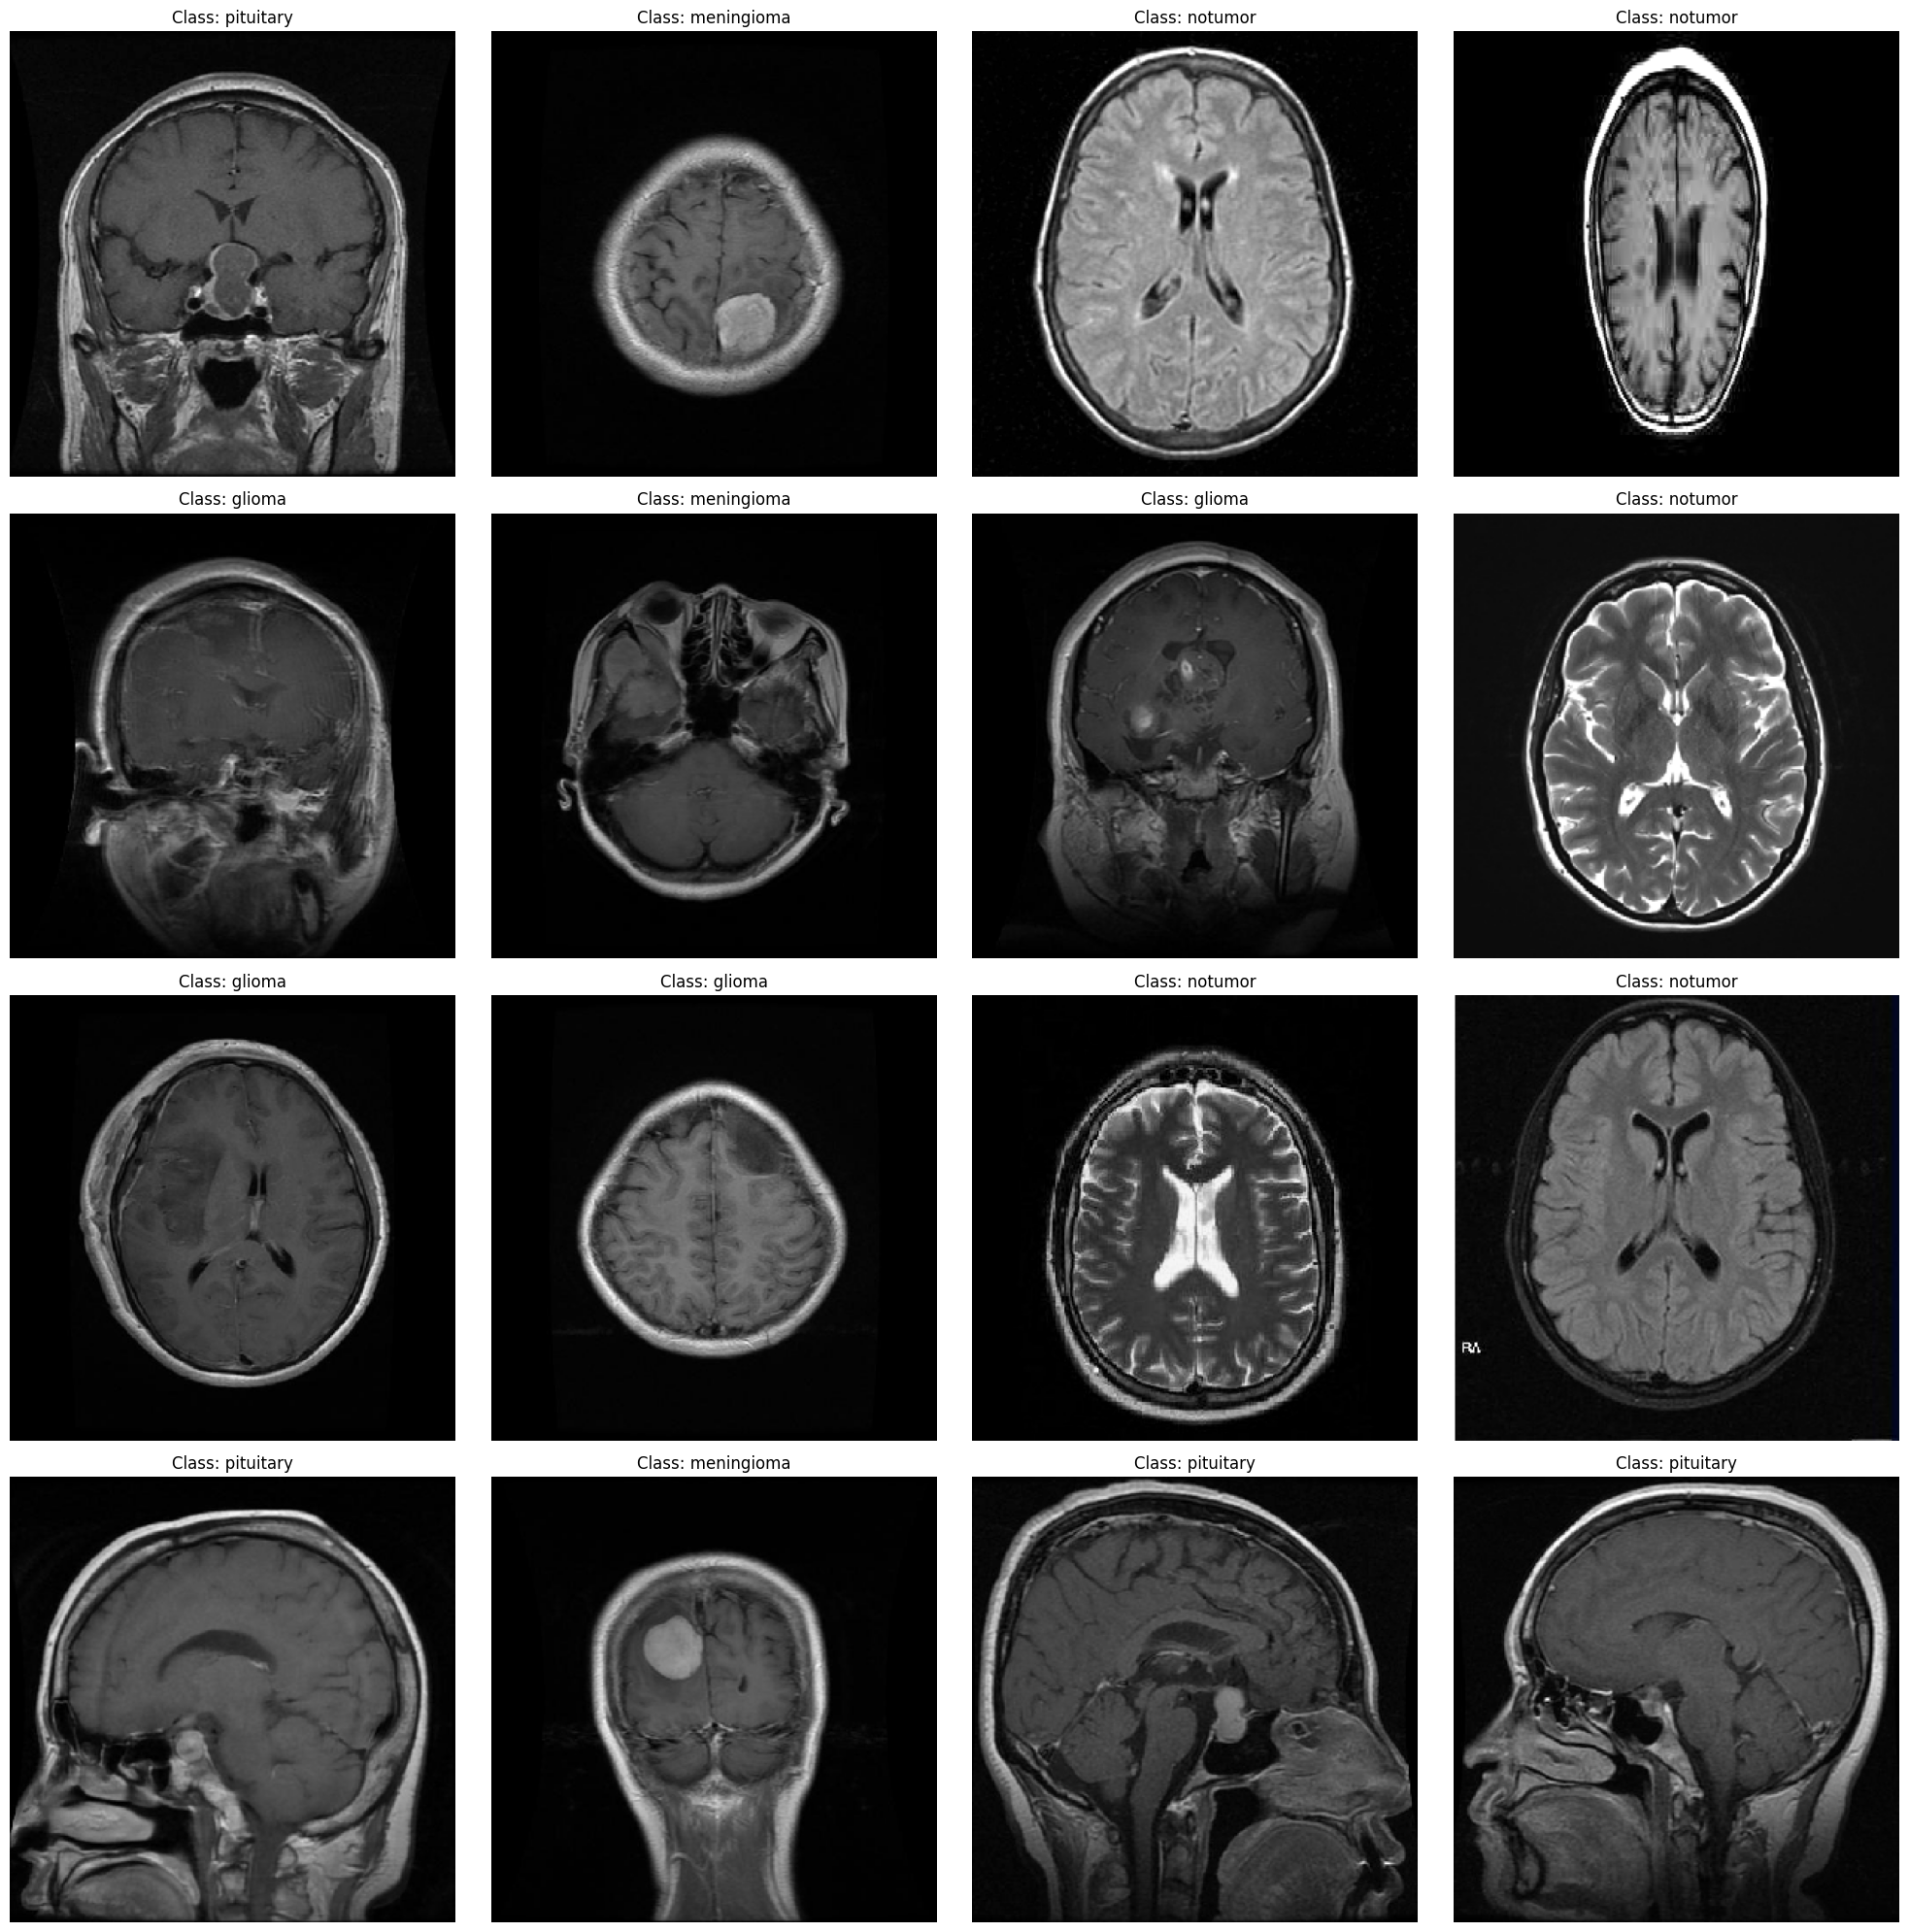

In [16]:
# Preview a few of the images in our training dataset.

plt.figure(figsize=(20, 20))

for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index.
  class_index = np.argmax(label)

  # Get the list of class names and class indices.
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices.
  index_position = class_indices.index(class_index)

  # Get the class name using the index position.
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()

# Implementing the Xception Model

In [17]:
# Define the shape of the images we're working with.
img_shape = (299, 299, 3) # 3 for 3 RGB layers

# Load the Xception model.
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

# Define the Sequential model.
# Consists of a sequence of layers, responsible for taking the output of the Xception model and transforming it into the final predictions.
# The dropout layer is used to prevent overfitting (when the model learns the training data too well.)  It randomly drops some of the neurons to help it generalize.
# The dense layers represent the layers of 128 and 4 neurons.
model = Sequential([base_model, Flatten(), Dropout(rate=0.3), Dense(128, activation="relu"), Dropout(rate=0.25), Dense(4, activation="softmax")])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
# Compile the model.
# Adamax is an optimizer, like a smart assistant that helps the model learn during training by adjusting the size of the steps when updating its knowledge and the
# weights of the model, based on how close or far off its prediction is, and whether its headed in the right direction.
# Low learning rate means it learns more slowly, but more accurately.
model.compile(Adamax(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy", Precision(name='precision'), Recall(name='recall')])

# Training the model

In [19]:
# Training our model.
# Pass in the training and validation generator.  5 epochs means the model
# will go through the entire training data set 5 times.
# After each epoch, the model will update its weights.
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.8018 - loss: 0.6115 - precision: 0.8435 - recall: 0.7259 - val_accuracy: 0.9618 - val_loss: 0.1148 - val_precision: 0.9632 - val_recall: 0.9603
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 808ms/step - accuracy: 0.9797 - loss: 0.0640 - precision: 0.9816 - recall: 0.9788 - val_accuracy: 0.9695 - val_loss: 0.0736 - val_precision: 0.9709 - val_recall: 0.9679
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 197s 778ms/step - accuracy: 0.9855 - loss: 0.0378 - precision: 0.9862 - recall: 0.9848 - val_accuracy: 0.9847 - val_loss: 0.0651 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 776ms/step - accuracy: 0.9944 - loss: 0.0170 - precision: 0.9964 - recall: 0.9944 - val_accuracy: 0.9878 - val_loss: 0.0334 - val_precision: 0.9893 - val_recall: 0.9878
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 774ms/step - accuracy: 0.9953 - loss: 0.0144 - precision: 0.9960 - recall: 0.9953 - val_accuracy: 0.9740 - val_loss: 

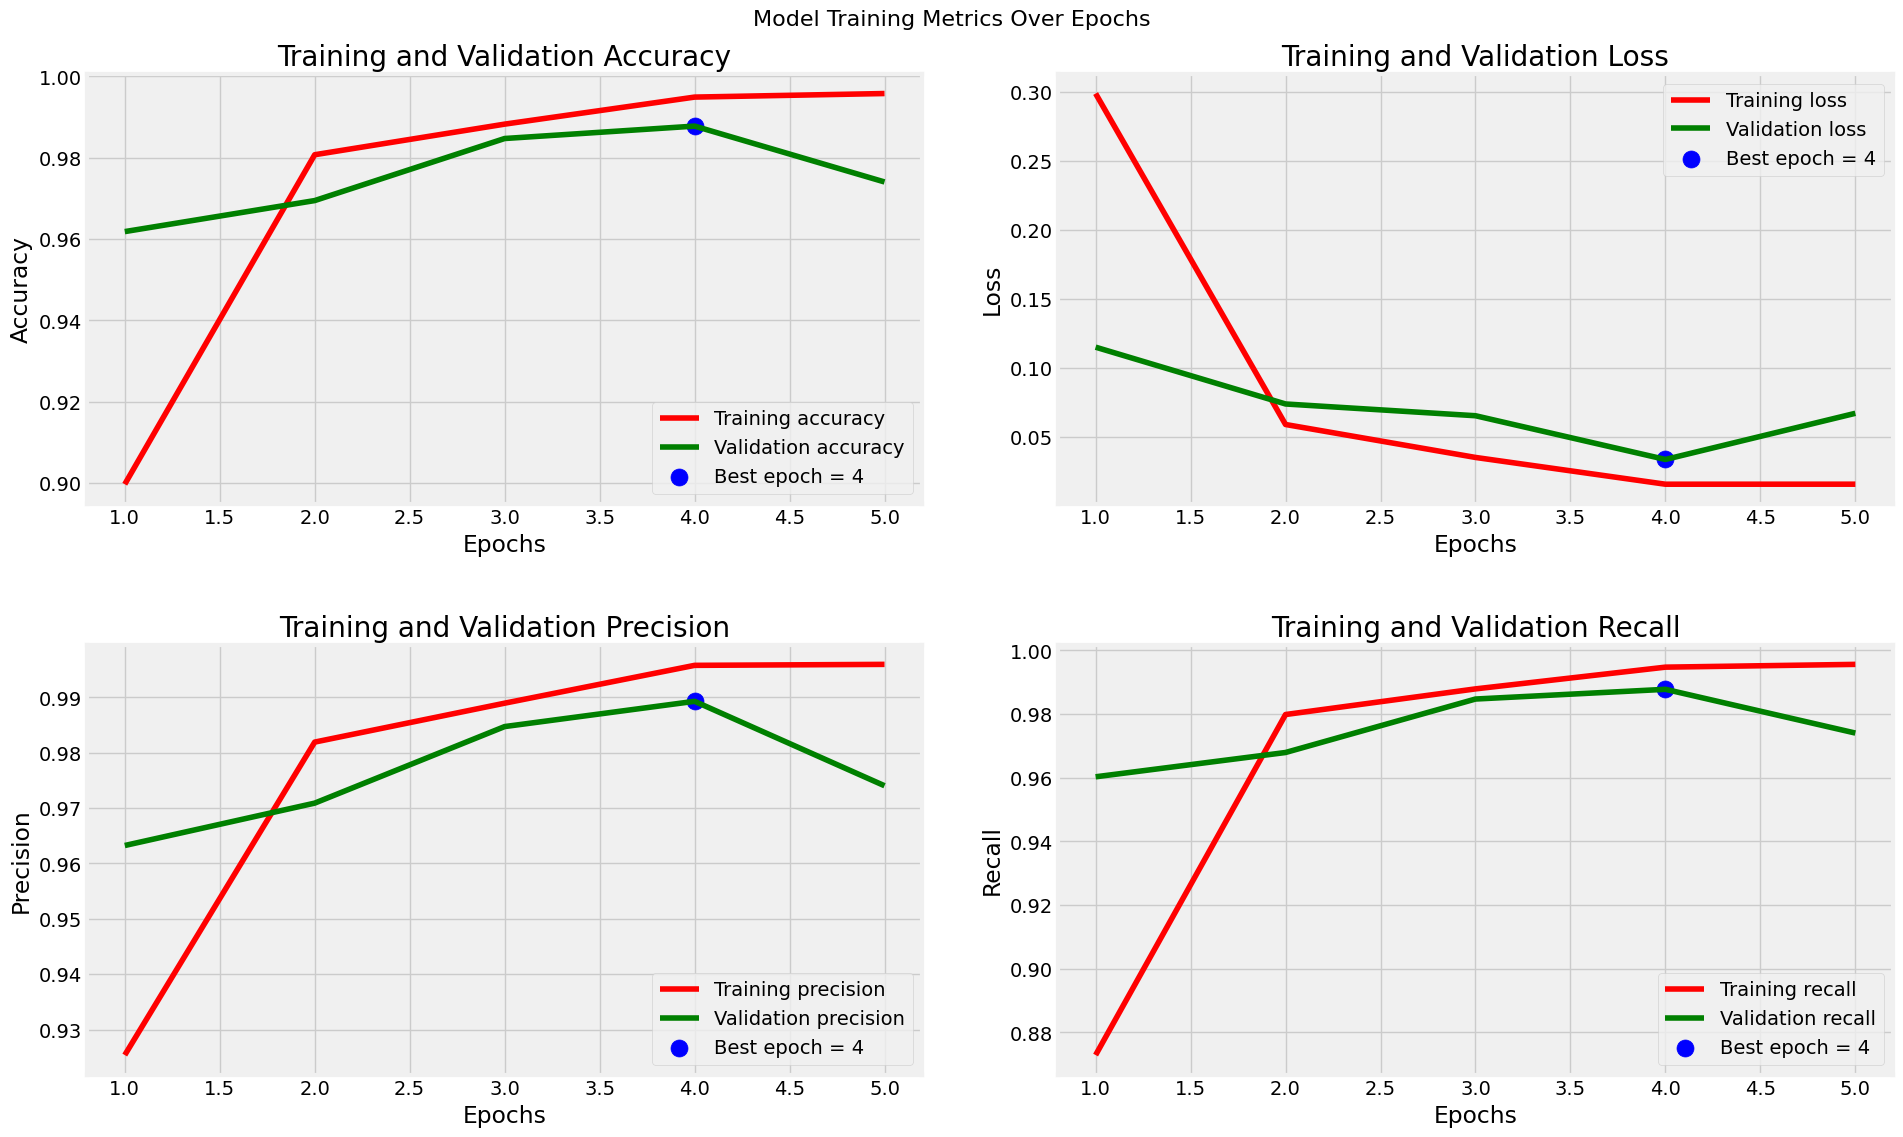

In [20]:
## Plot graphs to visiualize the training metrics over the 5 epochs, to better
## understand what happened to the model during training. ##

# Grab all the important metrics from our training.
metrics = ['accuracy', 'loss', 'precision', 'recall']
# Store them separately based on which set it belongs to.
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values based on which had the lowest loss (ie. when it
# was the most accurate and made the fewest mistakes.)
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.tight_layout(pad=3.0)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

You can see high training and validation accuracy correlates to low training and validation loss, as well as high training and validation precision and recall. We also see that those metrics improve over time with iterative training.  It's important to keep in mind that if the loss stays the same, that means the model is not learning anything at that point.

In [21]:
## Evaluating the model's performance on all three of the data sets: training, validation, and testing. ##
## Important to see how well our model generalizes to different data. ##

# Baseline for how well the model does on data it has seen before, using the
# dataset it was trained on.
train_score = model.evaluate(tr_gen, verbose=1)
# Testing the model on the validation dataset.  Used during training, but model
# never directly learned from it.  Helps us see if the model is overfitting or
# generalizing well.
valid_score = model.evaluate(valid_gen, verbose=1)
# Testing the model on new and unseen data, our testing dataset.  True measure
# of how well our model's performance is.
test_score = model.evaluate(ts_gen, verbose=1)

# Tells us how well the model learned the patterns it was trained on.
print(f"Train Accuracy: {train_score[1] * 100: .2f}%")
print(f"Train Loss: {train_score[0]: .4f}")
# Helps us determine how effective our training process was.
print(f"\n\nValidation Accuracy: {valid_score[1] * 100: .2f}%")
print(f"Validation Loss: {valid_score[0]: .4f}")
# Gives us a picture of how the model would perform in a real-world setting.
print(f"\n\nTest Accuracy: {test_score[1] * 100: .2f}%")
print(f"Test Loss: {test_score[0]: .4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 259ms/step - accuracy: 0.9970 - loss: 0.0072 - precision: 0.9972 - recall: 0.9969
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9765 - loss: 0.0631 - precision: 0.9775 - recall: 0.9765
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 1.0000 - loss: 0.0016 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9780 - loss: 0.0531 - precision: 0.9780 - recall: 0.9780
Train Accuracy:  99.67%
Train Loss:  0.0083


Validation Accuracy:  97.40%
Validation Loss:  0.0656


Test Accuracy:  98.17%
Test Loss:  0.0531


If the testing accuracy was lower (80-85%), it would mean that the model doesn't generalize well to new data.  It may require a new model architecture, or it may need to be trained longer or even less.

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step


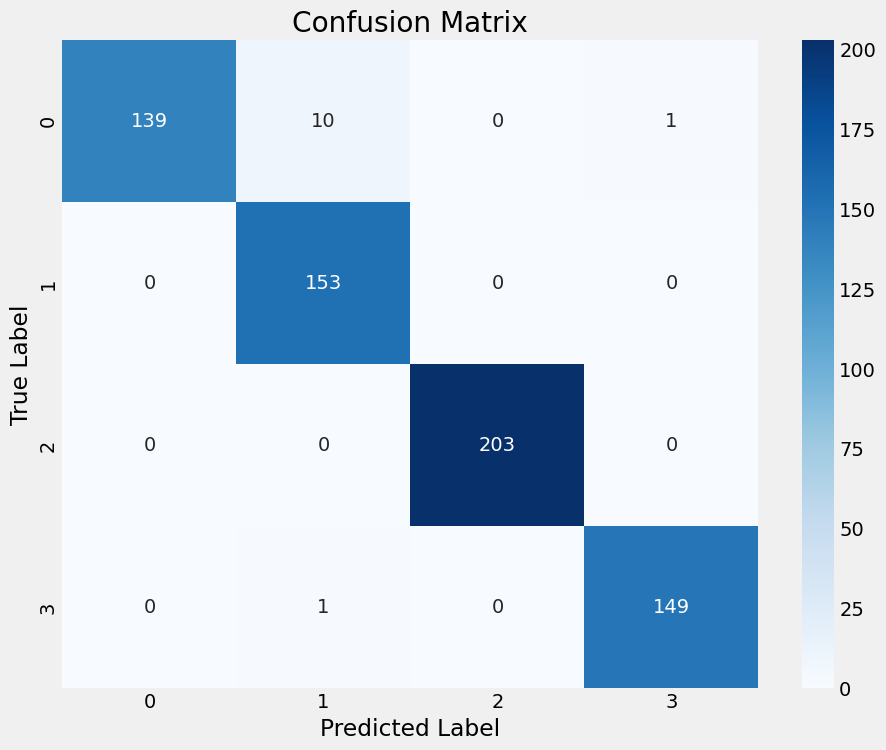

In [22]:
## Visualize how well the model performs on each class in the dataset using a confusion matrix, ##
## which shows us where the model succeeds and where it makes mistakes. ##

# Ask the model to make predictions on the scans in the testing set.
# Produces a list of probabilities.
preds = model.predict(ts_gen)
# Convert the scores into predictions (pick the class the model is most
# confident about.)
y_pred = np.argmax(preds, axis=1)

# Map class numerical representations to text.
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then, create and display the confusion matrix.
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Predicted Label - what the model thought the MRI scan was depicting.
True Label - what the tumor in the MRI scan actually was.

The diagonal shows all the correct predictions for each category.  The numbers outside of those are mistakes.  This confusion matrix not only depicts how accurate the model is, but also where it makes its mistakes.

In [23]:
from PIL import Image

# Function to visualize the model's predictions on test images.
# Takes in the image path for an MRI scan.
def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and pre-process image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))

    # Convert the image array to be 0's and 1's (numbers our model an understand.)
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


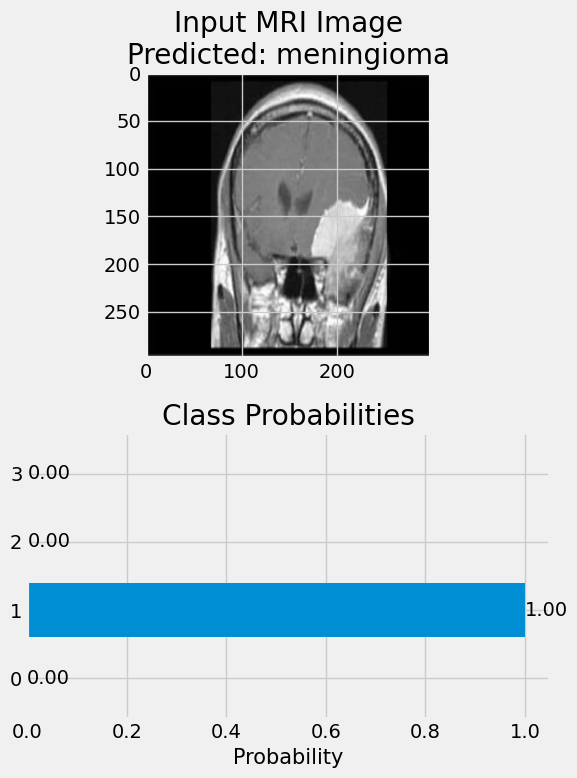


Predicted tumor type: meningioma


In [24]:
# Test the function with an MRI scan.
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [25]:
# Save the model's weights so we can use them in our web application.
model.save_weights("xception_model.weights.h5")

# Training a smaller model to see if we can achieve a similar level of accuracy

In [26]:
# Import the necessary layers to build our model.
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [27]:
# The number of images the model will process at once.
batch_size = 16

# Set image size for all MRI scans to be resized to.
img_size = (224, 224)

# Rescale the pixels values, and randomly adjust the brightness of the images to help our model
# be more robust.
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

# For testing, only rescale the pixel values, without changing the brightness.  This is because we
# want our data to be consistent and not introduce randomness.
ts_gen = ImageDataGenerator(rescale=1/255)

## Use the generators to create 3 data flows: one for training, one for testing and one for validation. ##
## Take the data from the dataframes and prepare them to be fed to our deep-learning model. ##

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [28]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional block number 1 (layer 1). 512 filters.
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional block number 2 (layer 2). 256 filters.
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Convolutional block number 3 (layer 3). 128 filters.
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Convolutional block number 4 (layer 4). 64 filters.
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output (lay all the filtered images out in a row)
cnn_model.add(Flatten())

# Fully connected dense layer 1. 256 neurons.
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

# Fully connected dense layer 2. 4 neurons, one for each of the 4 classes we're trying to predict.
cnn_model.add(Dense(4, activation='softmax'))

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the new, smaller model.
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 147s 335ms/step - accuracy: 0.5360 - loss: 2.2665 - precision: 0.6788 - recall: 0.3488 - val_accuracy: 0.7786 - val_loss: 0.8377 - val_precision: 0.8185 - val_recall: 0.7298
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 289ms/step - accuracy: 0.8073 - loss: 0.7442 - precision: 0.8293 - recall: 0.7734 - val_accuracy: 0.8031 - val_loss: 0.6409 - val_precision: 0.8311 - val_recall: 0.7664
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 295ms/step - accuracy: 0.8502 - loss: 0.5643 - precision: 0.8648 - recall: 0.8290 - val_accuracy: 0.8397 - val_loss: 0.5486 - val_precision: 0.8620 - val_recall: 0.8198
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 295ms/step - accuracy: 0.8842 - loss: 0.4503 - precision: 0.8950 - recall: 0.8723 - val_accuracy: 0.9023 - val_loss: 0.3889 - val_precision: 0.9128 - val_recall: 0.8947
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 289ms/step - accuracy: 0.9216 - loss: 0.3494 - precision: 0.9267 - recall: 0.9121 - val_accuracy: 0.9282 - val

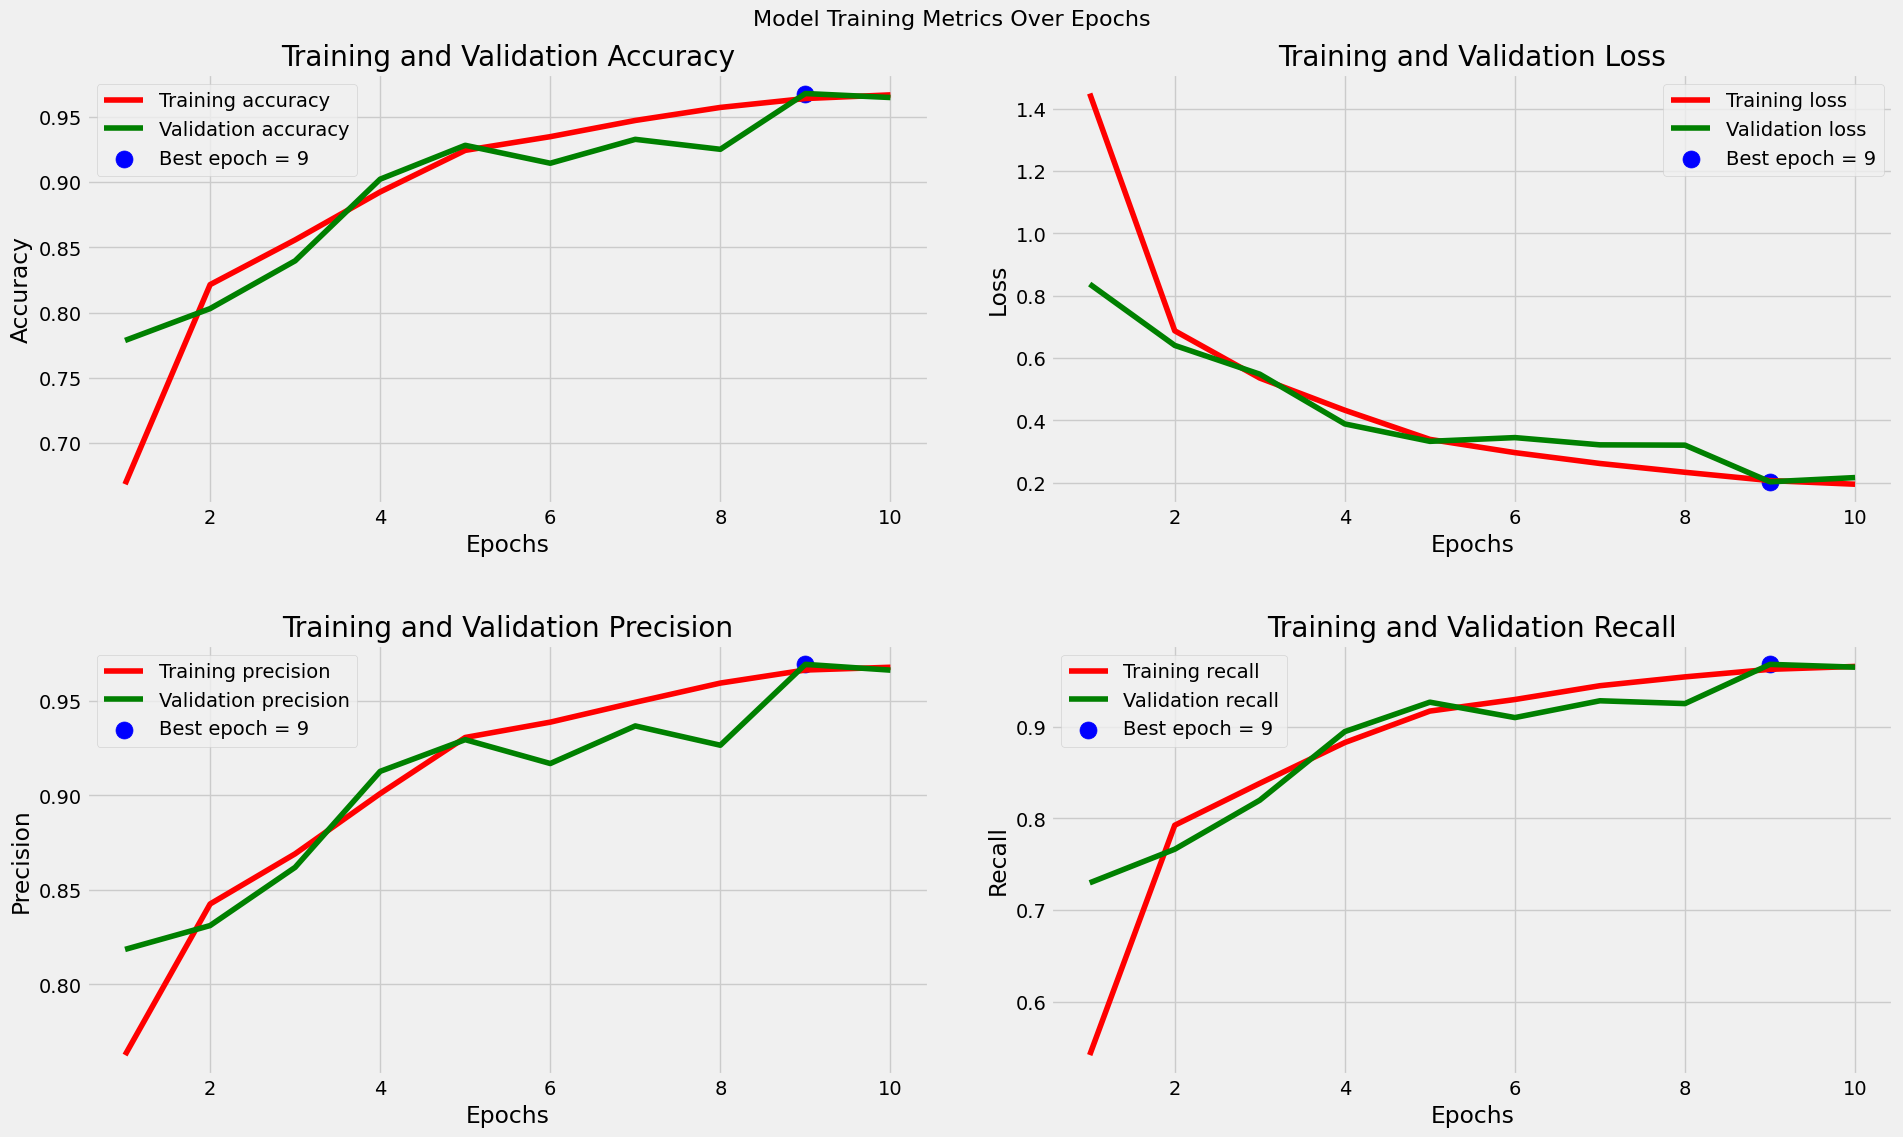

In [30]:
## Visualize the smaller model's training history ##
## Plot graphs to visiualize the training metrics over the 10 epochs, to better
## understand what happened to the model during training. ##


# Grab all the important metrics from our training.
metrics = ['accuracy', 'loss', 'precision', 'recall']
# Store them separately based on which set it belongs to.
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values based on which had the lowest loss (ie. when it
# was the most accurate and made the fewest mistakes.)
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.tight_layout(pad=3.0)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [31]:
## Evaluate the smaller model. ##
## Evaluating the model's performance on all three of the data sets: training, validation, and testing. ##
## Important to see how well our model generalizes to different data. ##

# Baseline for how well the model does on data it has seen before, using the
# dataset it was trained on.
train_score = cnn_model.evaluate(tr_gen, verbose=1)
# Testing the model on the validation dataset.  Used during training, but model
# never directly learned from it.  Helps us see if the model is overfitting or
# generalizing well.
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
# Testing the model on new and unseen data, our testing dataset.  True measure
# of how well our model's performance is.
test_score = cnn_model.evaluate(ts_gen, verbose=1)

# Tells us how well the model learned the patterns it was trained on.
print(f"Train Accuracy: {train_score[1] * 100: .2f}%")
print(f"Train Loss: {train_score[0]: .4f}")
# Helps us determine how effective our training process was.
print(f"\n\nValidation Accuracy: {valid_score[1] * 100: .2f}%")
print(f"Validation Loss: {valid_score[0]: .4f}")
# Gives us a picture of how the model would perform in a real-world setting.
print(f"\n\nTest Accuracy: {test_score[1] * 100: .2f}%")
print(f"Test Loss: {test_score[0]: .4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.9925 - loss: 0.1403 - precision: 0.9925 - recall: 0.9920
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9591 - loss: 0.2352 - precision: 0.9596 - recall: 0.9581
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9531 - loss: 0.1924 - precision: 0.9531 - recall: 0.9531 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9575 - loss: 0.2451 - precision: 0.9622 - recall: 0.9575
Train Accuracy:  99.23%
Train Loss:  0.1410


Validation Accuracy:  96.49%
Validation Loss:  0.2178


Test Accuracy:  96.04%
Test Loss:  0.2483


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


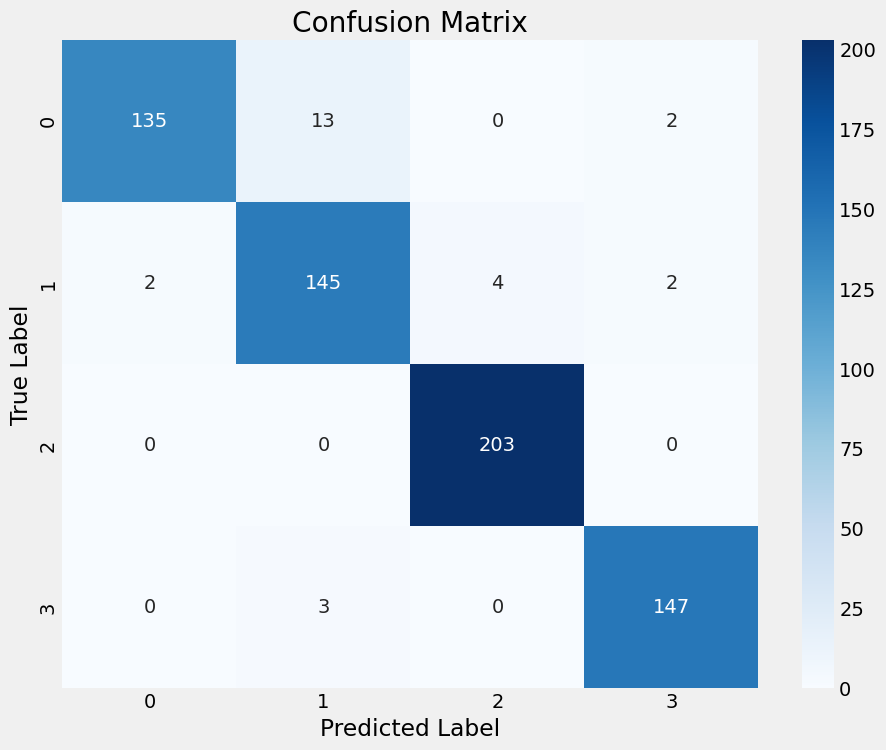

In [32]:
## Visualize how well the smaller model performs on each class in the dataset ##
## using a confusion matrix. ##

# Ask the model to make predictions on the scans in the testing set.
# Produces a list of probabilities.
preds = cnn_model.predict(ts_gen)
# Convert the scores into predictions (pick the class the model is most
# confident about.)
y_pred = np.argmax(preds, axis=1)

# Map class numerical representations to text.
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then, create and display the confusion matrix.
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Generate a classification report for the smaller model.
clr = classification_report(ts_gen.classes, y_pred)

print(clr)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       150
           1       0.90      0.95      0.92       153
           2       0.98      1.00      0.99       203
           3       0.97      0.98      0.98       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [34]:
# Save the smaller model.
cnn_model.save("cnn_model.h5")